<a href="https://colab.research.google.com/github/AditMeh/deep-learning/blob/main/meta-learning/siamese_net/train_siamese_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/AditMeh/deep-learning

Cloning into 'deep-learning'...
remote: Enumerating objects: 419, done.
remote: Counting objects: 100% (419/419), done.
remote: Compressing objects: 100% (291/291), done.
remote: Total 419 (delta 206), reused 172 (delta 72), pack-reused 0
Receiving objects: 100% (419/419), 24.45 MiB | 26.25 MiB/s, done.
Resolving deltas: 100% (206/206), done.


In [2]:
%%capture
%cd ./deep-learning/meta-learning/siamese_net/
!git clone https://github.com/brendenlake/omniglot
%cd omniglot/python
!unzip images_background.zip
!unzip images_evaluation.zip
%cd ../..

In [3]:
from random import sample
from dataloader import RandomPairSampler, Ommniglot_Dataset
from torch.utils.data import DataLoader
from utils import dataset_to_dicts
from model import SiameseNet
from train import train_fixed_dataset, train_random_samples
import torch

TRAIN_DATASET_PATH = "omniglot/python/images_background/"
VALIDATION_DATASET_PATH = "omniglot/python/images_evaluation/"

ds_train_structured, ds_train_unstructured = dataset_to_dicts(
    TRAIN_DATASET_PATH)
ds_val_structured, ds_val_unstructured = dataset_to_dicts(
    VALIDATION_DATASET_PATH)

train_dataset_random = RandomPairSampler(
    dataset_dict=ds_train_unstructured, sample_mode="uniform", is_val=False)

val_dataset_random = RandomPairSampler(
    dataset_dict=ds_val_unstructured, sample_mode="uniform", is_val=True)

train_loader_random = DataLoader(
    train_dataset_random, batch_size=32, num_workers=2)

val_loader_random = DataLoader(
    val_dataset_random, batch_size=32, num_workers=2)

In [4]:
train_dataset_fixed = Ommniglot_Dataset(30000,
    dataset_dict=ds_train_structured, sample_mode="within alphabet", is_val=False)

val_dataset_fixed = Ommniglot_Dataset(10000,
    dataset_dict=ds_val_structured, sample_mode="within alphabet", is_val=True)

train_loader_fixed = DataLoader(
    train_dataset_fixed, batch_size=32, num_workers=2)

val_loader_fixed = DataLoader(
    val_dataset_fixed, batch_size=32, num_workers=2)

tensor([1.])


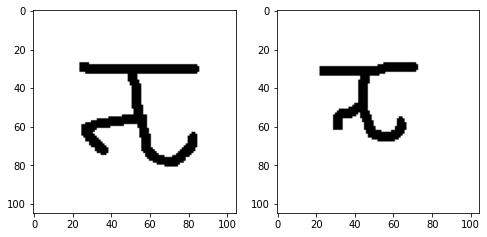

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

x1, x2, label = next(iter(val_loader_fixed))
idx = 0

images = [torch.squeeze(x1[idx]).cpu().detach().numpy(), torch.squeeze(x2[idx]).cpu().detach().numpy()]

print(label[idx])

w = 10
h = 10
fig = plt.figure(figsize=(8, 8))
columns = 2
rows = 1
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(images[i - 1], cmap='gray')
plt.show()

In [ ]:
device = (torch.device('cuda') if torch.cuda.is_available()
            else torch.device('cpu'))

print(f"Training on device {device}.")

net = SiameseNet().to(device=device)

train_random_samples(net, train_loader_fixed, val_loader_fixed, samples_per_epoch=30000, samples_val=10000, n_epochs=20,
        lr=0.001, device=device, batch_size=32, save_path="blank")

Training on device cuda.


  0%|          | 0/937 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
 12%|█▏        | 116/937 [00:10<01:09, 11.83it/s]

In [ ]:
device = (torch.device('cuda') if torch.cuda.is_available()
            else torch.device('cpu'))

print(f"Training on device {device}.")

net = SiameseNet().to(device=device)

train_fixed_dataset(net, train_loader=train_loader_fixed, val_loader=val_loader_fixed, n_epochs=20, lr=0.00001, device=device, batch_size=32, save_path="wew")